In [108]:
%matplotlib inline
import seaborn
import scipy
import sklearn
from sklearn import preprocessing
import librosa, librosa.display
import os
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

## Loading audio files

In [109]:
BASE_DIR='/Users/larsrass/Desktop/Research/Music Files/'
ambient_file = "Mono1.mp3"
ipd.Audio(os.path.join(BASE_DIR,ambient_file))
# load audio files with librosa
x_ambient, sr = librosa.load(os.path.join(BASE_DIR,ambient_file))

##Set Variables
FRAME_SIZE = 1024
HOP_LENGTH = 512


## Set Interval to observe

In [110]:
##Set Seconds to View
sec_start, sec_stop = 1345 , 1346
x_ambient = x_ambient[int(sec_start*sr):int(sec_stop*sr)]

## Spectral centroid

The frequency at which a spectrum's energy is centered around is known as the spectral centroid.

In the calculated features - Per second we have: 44.067950581395344 values 
In X_ambient - Per second we have: 22084.052507267443 values 


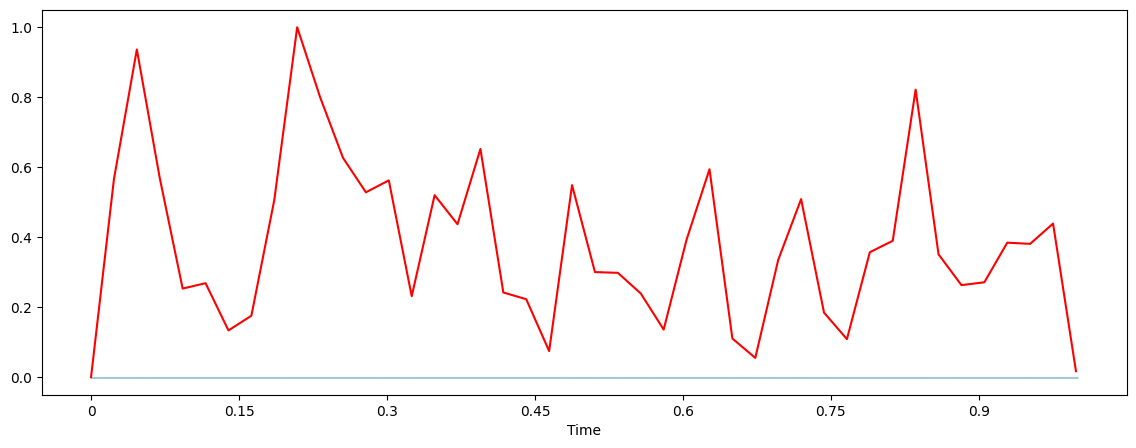

In [111]:


spectral_centroids_ambient = librosa.feature.spectral_centroid(y=x_ambient, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
frames = range(len(spectral_centroids_ambient))
t = librosa.frames_to_time(frames) 
#spectral_centroids_ambient[0] = spectral_centroids_ambient[1]

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

normalized_spectral_centroids_ambient = normalize(spectral_centroids_ambient)

plt.rcParams['figure.figsize'] = (14, 5)
librosa.display.waveshow(x_ambient, sr=sr, alpha=0.4)
plt.plot(t, normalized_spectral_centroids_ambient, color='r') # normalize for visualization purposes


print("In the calculated features - Per second we have: " + str(t.size/t[-1]) + " values ")
print("In X_ambient - Per second we have: " + str(x_ambient.size/t[-1]) + " values ")



[Text(0.5, 1.0, 'log Power spectrogram')]

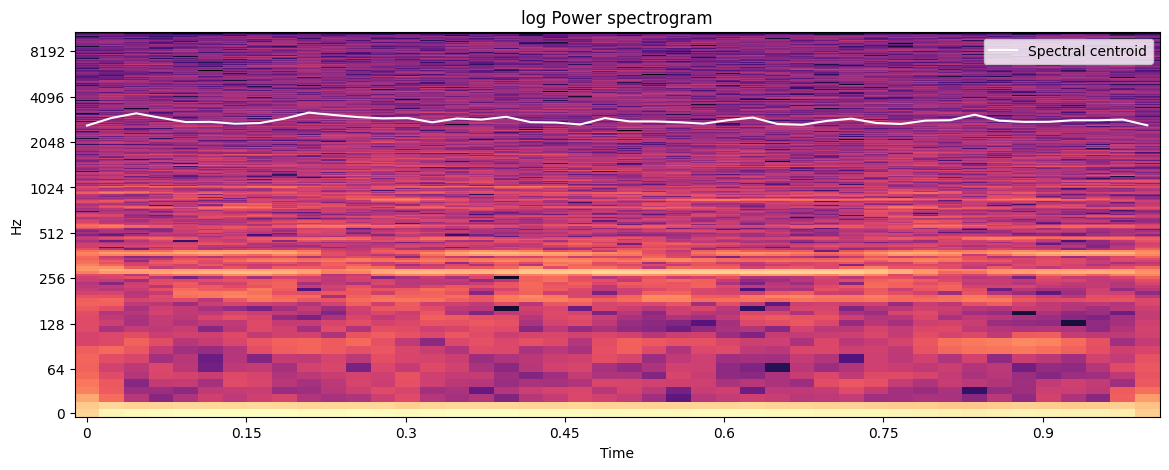

In [112]:
import matplotlib.pyplot as plt
times = librosa.times_like(spectral_centroids_ambient)
fig, ax = plt.subplots()
S, phase = librosa.magphase(librosa.stft(y=x_ambient))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, spectral_centroids_ambient.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

## Spectral bandwidth

Computes the p’th-order spectral bandwidth.

In [113]:
ban_ambient = librosa.feature.spectral_bandwidth(y=x_ambient, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
ban_ambient.shape
print(ban_ambient[:50])

[3187.25549638 3214.12306391 3257.54606259 3170.6549925  3116.68124544
 3125.20602688 3105.2574059  3087.42513559 3226.62234771 3283.90831963
 3185.32245016 3191.4894967  3127.20402001 3156.55087139 3087.25468659
 3235.55589962 3166.71977004 3294.51062742 3139.23642377 3172.71844568
 3140.95545997 3269.80499024 3138.22224406 3146.0092205  3152.28419488
 3131.97737431 3169.40672518 3237.94117192 3160.13047745 3086.77287576
 3167.6429697  3262.18045335 3107.17211226 3021.73886263 3107.12001361
 3070.61868455 3239.36535083 3140.11239169 3080.15526314 3112.0621764
 3154.49579205 3124.2614496  3093.49680515 2988.25170802]


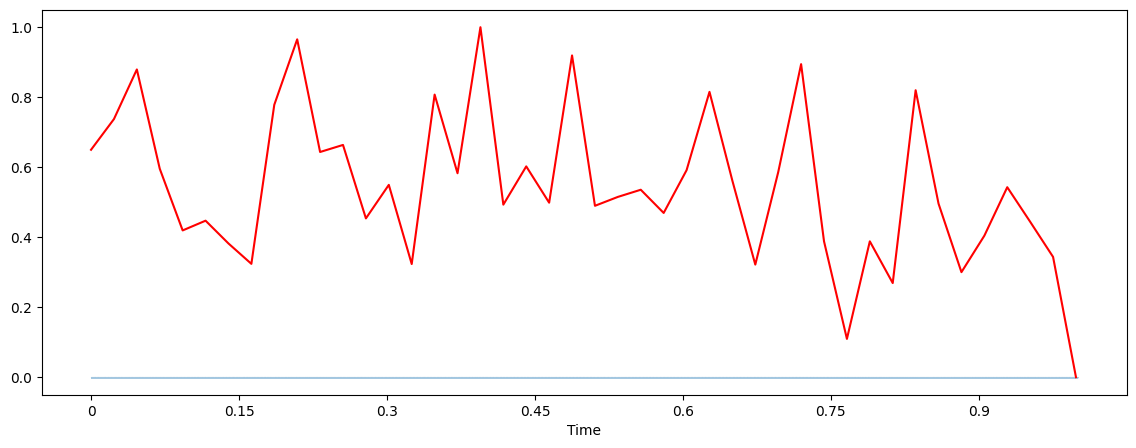

In [114]:
librosa.display.waveshow(x_ambient, sr=sr, alpha=0.4)
plt.plot(t, normalize(ban_ambient), color='r')


## Root-Mean-Squared

Compute root-mean-square (RMS) value for each frame

In [115]:
rms_ambient = librosa.feature.rms(y=x_ambient, frame_length=FRAME_SIZE ,hop_length=HOP_LENGTH)
#S, phase = librosa.magphase(librosa.stft(ambient))
#rms_ambient = librosa.feature.rms(S=S)
rms_ambient.shape

(1, 44)

[Text(0.5, 1.0, 'log Power spectrogram')]

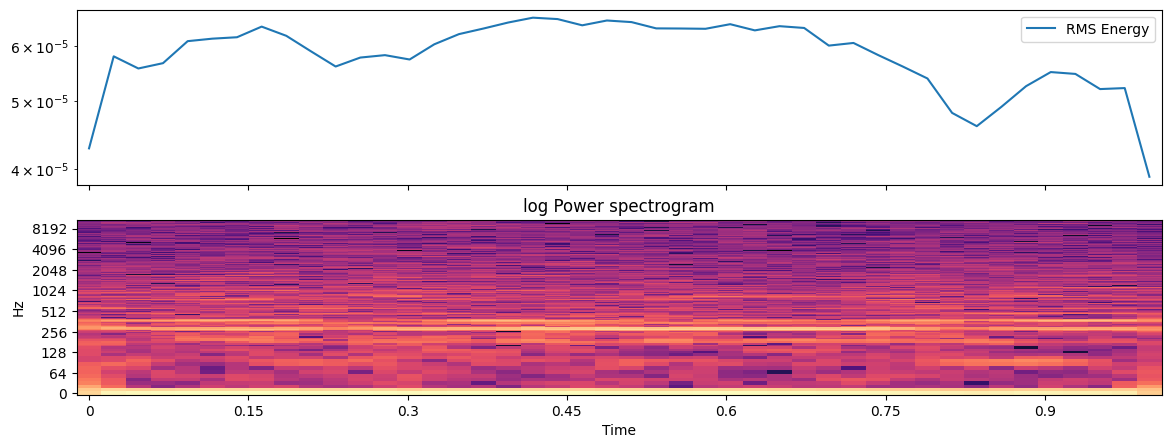

In [116]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms_ambient)
ax[0].semilogy(times, rms_ambient[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

## Spectral Contrast

In each frequency subband, the spectral peak, spectral valley, and their differences are taken into account when calculating spectral contrast.

In [117]:
S = np.abs(librosa.stft(x_ambient))
contrast_ambient = librosa.feature.spectral_contrast(S=S, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
contrast_ambient.shape

(7, 44)

For every time frame, the function calculates the spectral contrast for seven subbands:

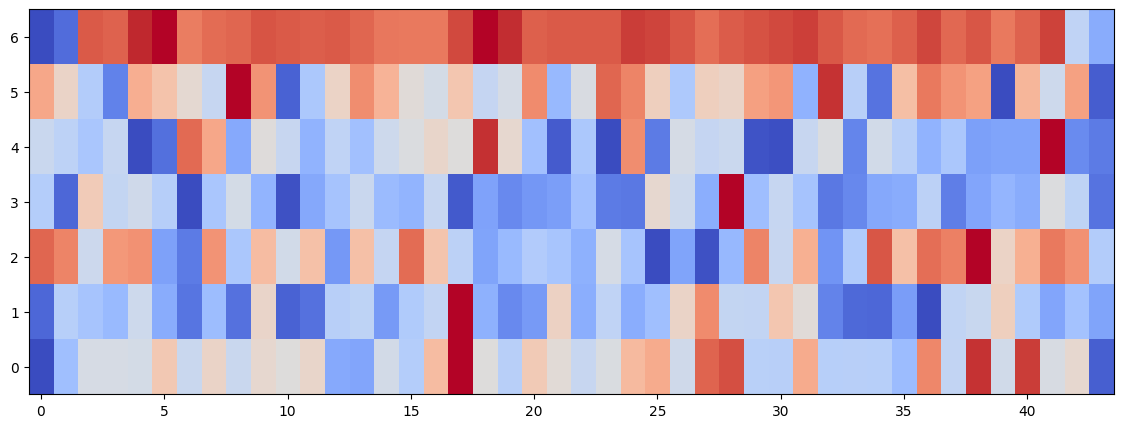

In [118]:
plt.imshow(normalize(contrast_ambient, axis=1), aspect='auto', origin='lower', cmap='coolwarm')


[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

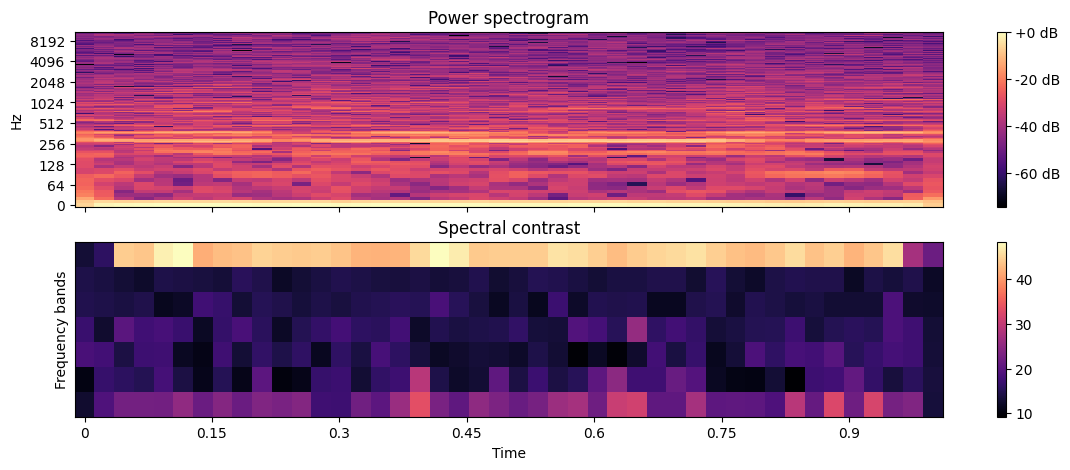

In [119]:
#Show Spectrogram
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast_ambient, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

## Spectral Flatness

Spectral flatness (or tonality coefficient) measures how "noise" or "tone" like a sound is. Closer to 1 indicates more white-noise similarity 

In [120]:
flatness_ambient = librosa.feature.spectral_flatness(y=x_ambient, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
flatness_ambient.shape

(1, 44)

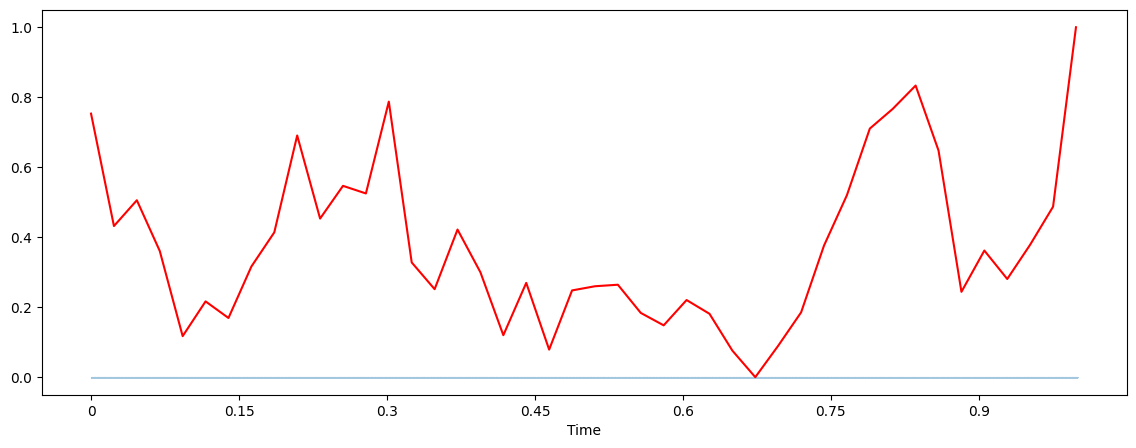

In [121]:
librosa.display.waveshow(x_ambient, sr=sr, alpha=0.4)
plt.plot(t, normalize(flatness_ambient[0]), color='r')

## Spectral Rolloff

Every frame's roll-off frequency is specified as the center frequency of a spectrogram bin such that this bin and the bins below contain at least roll_percent (0.85 by default) of the spectrum's energy.

In [122]:
rolloff_ambient_85 = librosa.feature.spectral_rolloff(y=x_ambient, roll_percent = 0.85, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
#rolloff_ambient_99 = librosa.feature.spectral_rolloff(y=ambient, roll_percent = 0.85, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
#rolloff_ambient_01 = librosa.feature.spectral_rolloff(y=ambient, roll_percent = 0.01, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
rolloff_ambient_85.shape

(1, 44)

Therefore one might want to calculate rolloff frequencies for different energy percentages

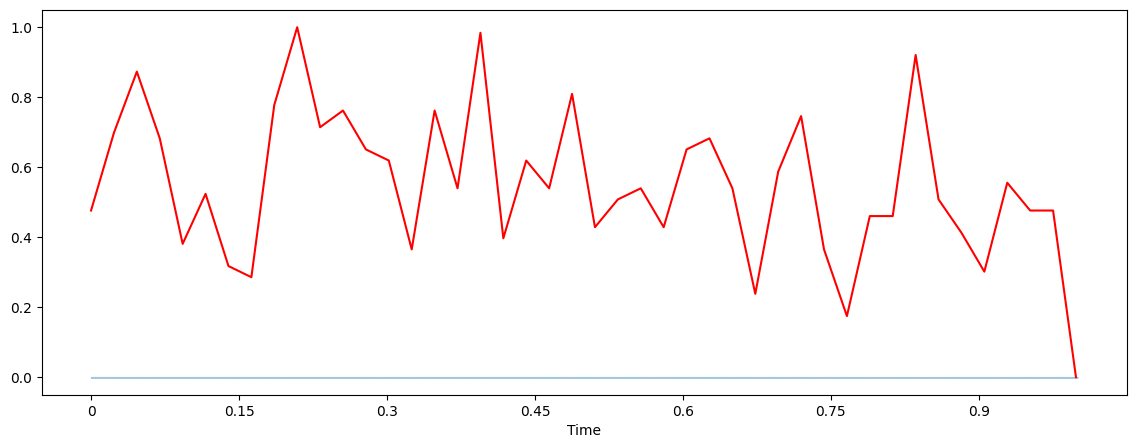

In [123]:
librosa.display.waveshow(x_ambient, sr=sr, alpha=0.4)
plt.plot(t, normalize(rolloff_ambient_85[0]), color='r')

[Text(0.5, 1.0, 'log Power spectrogram')]

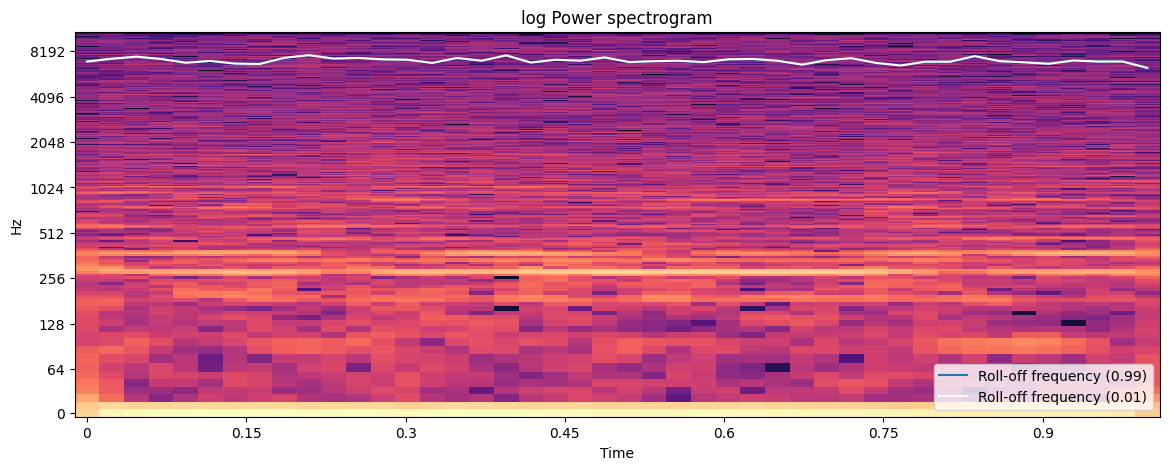

In [124]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff_ambient_85), rolloff_ambient_85[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff_ambient_85), rolloff_ambient_85[0], color='w',
        label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')